In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
def load_img():
    blank_img = np.zeros((600, 600))
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(blank_img, "ABCDE", org = (50, 300), fontFace = font, fontScale = 5, color = (255, 255, 255), thickness = 25, lineType = cv2.LINE_AA)
    return blank_img

In [10]:
def display_img(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

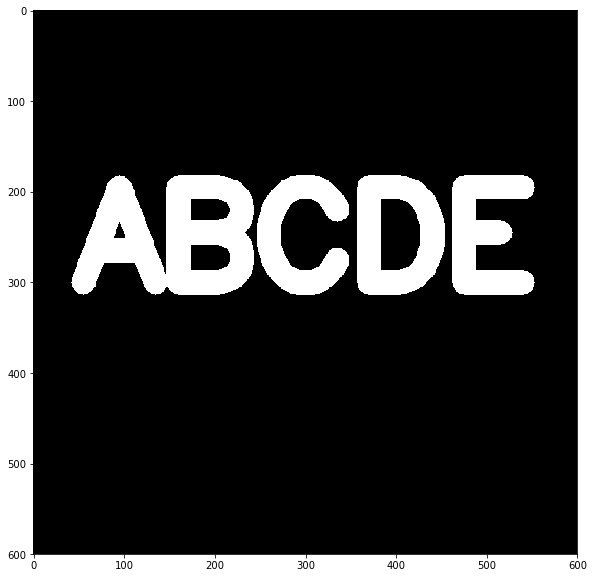

In [11]:
img = load_img()
display_img(img)

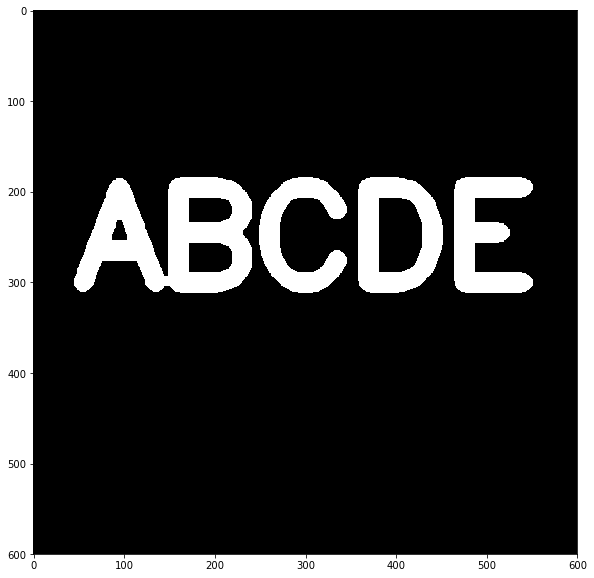

In [12]:
#Erosion - 
#Erodes away boundaries of foreground objects.
#Works best when foreground is light color (preferably white) and background is dark.
kernel = np.ones((5, 5), dtype = np.uint8)
eroded = cv2.erode(img, kernel, iterations = 1)
display_img(eroded)

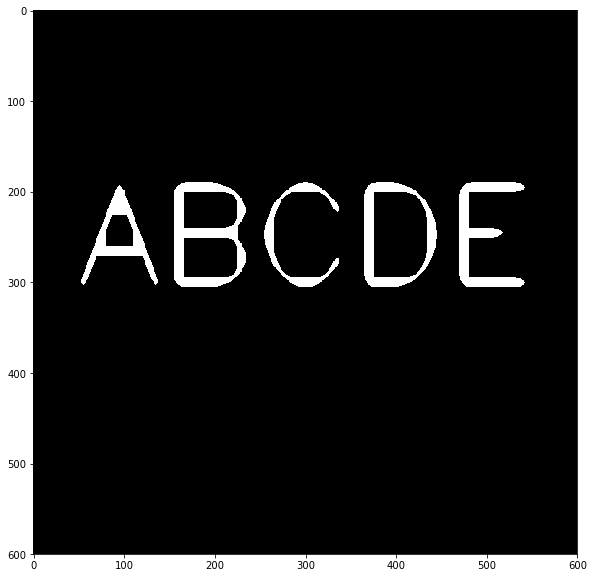

In [15]:
kernel = np.ones((5, 5), dtype = np.uint8)
eroded = cv2.erode(img, kernel, iterations = 4)
display_img(eroded)  #more of the fg is eroded

In [16]:
#opening 
#this is to remove bg noise
#it is erosion followed by dilation

In [17]:
#create an image with black noise over white
img = load_img()

In [20]:
white_noise = np.random.randint(low = 0, high = 2, size = (600, 600)) #0 and 1 randomly - noise (w and b) 2 is exclusive

In [21]:
white_noise

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 0, 1],
       [1, 0, 0, ..., 0, 1, 1],
       ...,
       [0, 1, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 1, 0, 0],
       [0, 1, 1, ..., 0, 0, 1]])

In [22]:
white_noise.shape


(600, 600)

In [23]:
white_noise = white_noise * 255
white_noise

array([[255, 255,   0, ..., 255,   0, 255],
       [255, 255, 255, ..., 255,   0, 255],
       [255,   0,   0, ...,   0, 255, 255],
       ...,
       [  0, 255, 255, ..., 255,   0, 255],
       [  0, 255,   0, ..., 255,   0,   0],
       [  0, 255, 255, ...,   0,   0, 255]])

In [24]:
img.shape

(600, 600)

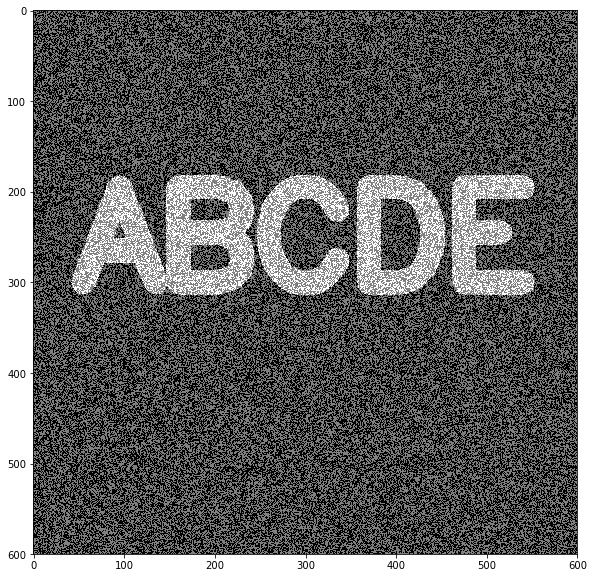

In [25]:
noise_img = white_noise + img
display_img(noise_img)

In [26]:
opened = cv2.morphologyEx(noise_img, cv2.MORPH_OPEN, kernel)

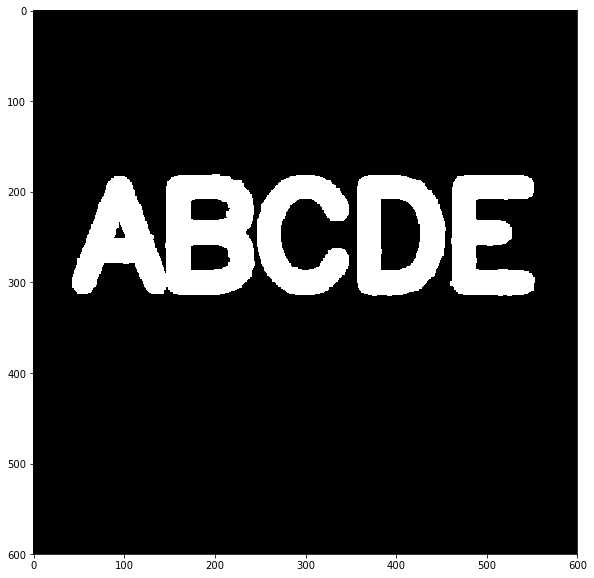

In [27]:
display_img(opened)

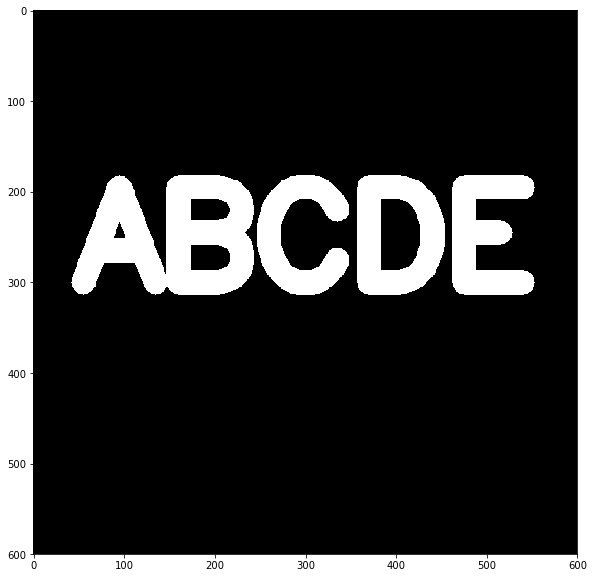

In [32]:
#Perform closing operation- to remove fg noise
#this is such as for black dots on a white img (text etc)
img = load_img()
display_img(img)

In [40]:
black_noise = np.random.randint(low = 0, high = 2, size = (600, 600))
black_noise

array([[1, 0, 0, ..., 1, 0, 1],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 1, 1],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]])

In [35]:
img.max()

255.0

In [41]:
#we need to overlay black noise on the white values, hence pull some white down
black_noise = black_noise * -255

In [42]:
black_noise

array([[-255,    0,    0, ..., -255,    0, -255],
       [-255, -255,    0, ...,    0,    0,    0],
       [   0,    0, -255, ...,    0, -255, -255],
       ...,
       [   0,    0,    0, ..., -255,    0,    0],
       [-255,    0, -255, ...,    0,    0,    0],
       [-255, -255, -255, ...,    0,    0,    0]])

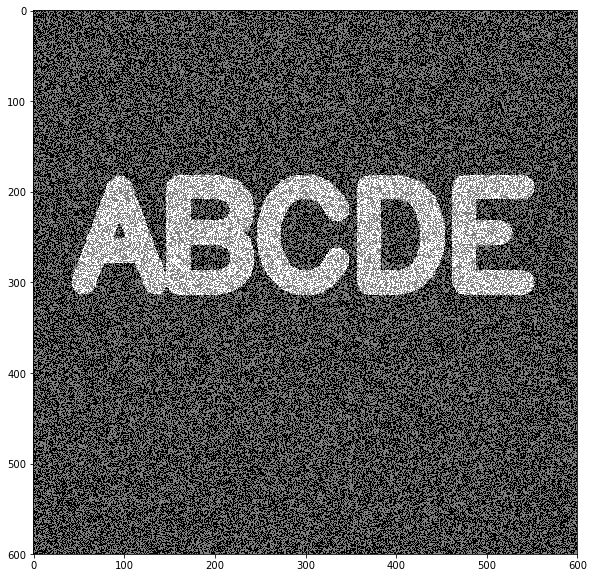

In [43]:
black_noised_img = black_noise + img
display_img(black_noised_img)

In [44]:
# we need noise only in the fg
black_noised_img[black_noised_img == -255] = 0

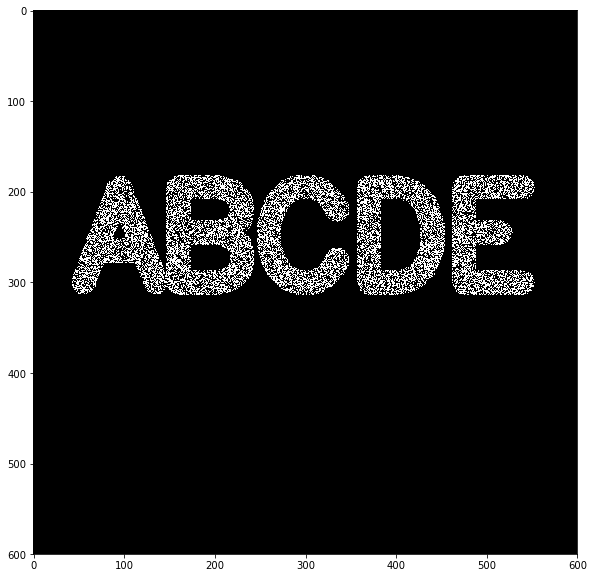

In [45]:
display_img(black_noised_img)

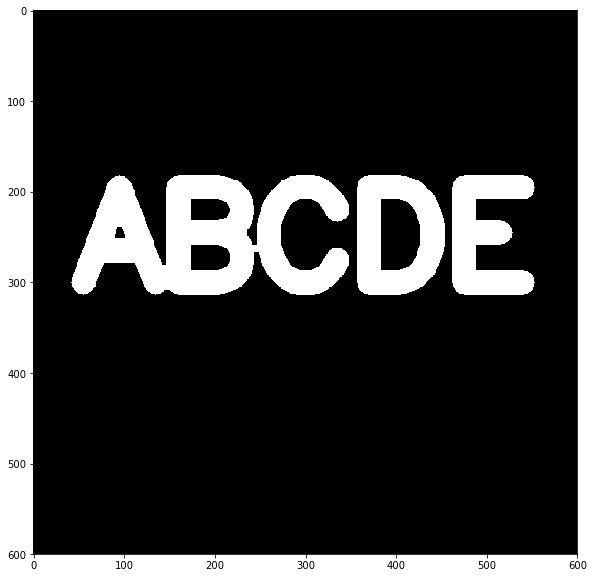

In [46]:
closed = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
display_img(closed)

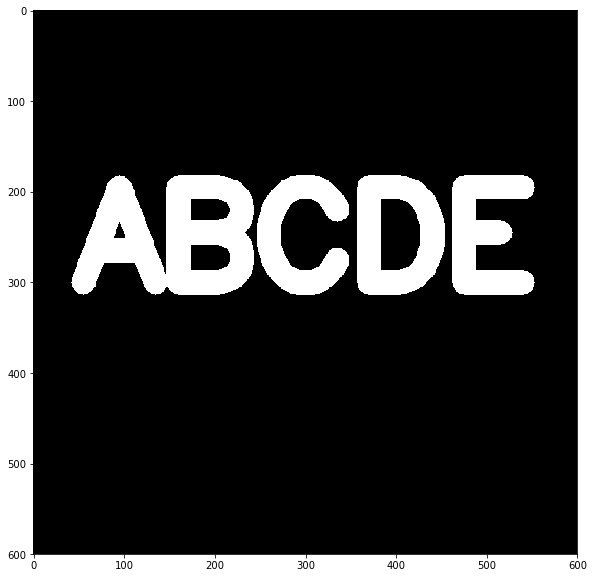

In [47]:
##############
#applying a morph gradient - this is the opn which performs the difference between erosion and dilation
#hence it gets the edges as it pushed in 2 opp dirns

img = load_img()
display_img(img)

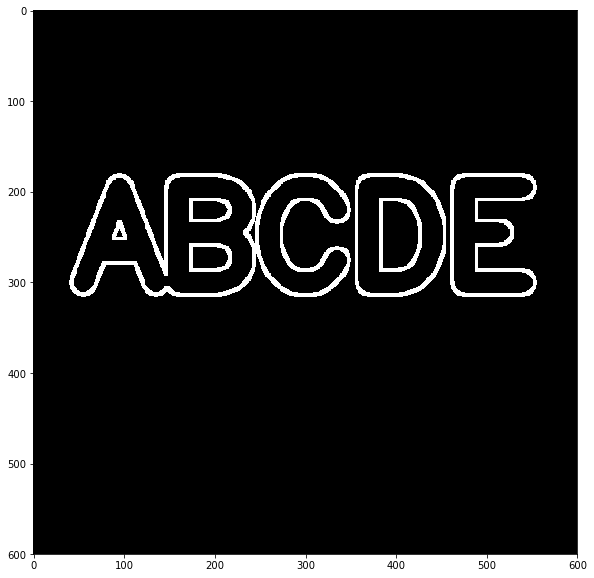

In [30]:
grad = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
display_img(grad)

In [31]:
#FIN